In [46]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [47]:
data = pd.read_csv("/home/jay/Elevate_lab_tasks/Datasets/Titanic-Dataset.csv")
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [48]:
data.shape

(891, 12)

In [49]:
# data validation

# dataframe for datatype
data_type = pd.DataFrame(data.dtypes,columns=['Data_type'])

# dataframe for missing values
data_missing = pd.DataFrame(np.round(data.isnull().mean()*100,2),columns = ['Missing_percentage'])

sample_data = pd.DataFrame(data.head(2).T)

# concatinating above dataframe
data_concat = pd.concat([data_type,data_missing,sample_data],axis=1)

data_concat.rename(columns = {0: 'Columns_1',
                              1: 'Columns_2'}, inplace = True)
data_concat

Data_type  Missing_percentage                Columns_1  \
PassengerId     int64                0.00                        1   
Survived        int64                0.00                        0   
Pclass          int64                0.00                        3   
Name           object                0.00  Braund, Mr. Owen Harris   
Sex            object                0.00                     male   
Age           float64               19.87                     22.0   
SibSp           int64                0.00                        1   
Parch           int64                0.00                        0   
Ticket         object                0.00                A/5 21171   
Fare          float64                0.00                     7.25   
Cabin          object               77.10                      NaN   
Embarked       object                0.22                        S   

                                                     Columns_2  
PassengerId                                                  2  
Survived                                                     1  
Pclass                                                       1  
Name         Cumings, Mrs. John Bradley (Florence Briggs Th...  
Sex                                                     female  
Age                                                       38.0  
SibSp                                                        1  
Parch                                                        0  
Ticket                                                PC 17599  
Fare                                                   71.2833  
Cabin                                                      C85  
Embarked                                                     C

In [50]:
# handling the missing values

data['Age'] = data['Age'].fillna(data['Age'].median())  # using median instead of mean as data has outliers

# for categorical values we use mode
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])

data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

data.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked  
0      0         A/5 21171   7.2500  B96 B98        S  
1      0          PC 17599  71.2833      C85        C  
2      0  STON/O2. 3101282   7.9250  B96 B98        S  
3      0            113803  53.1000     C123        S  
4      0            373450   8.0500  B96 B98        S

In [51]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [52]:
# removing passengerid
data=data.iloc[:,1:]

In [53]:
for cols in data.columns:
    if data[cols].dtype == 'O':
        print(cols,":",data[cols].nunique())

Name : 891
Sex : 2
Ticket : 681
Cabin : 147
Embarked : 3


In [54]:
# using Label encoding
from sklearn.preprocessing import LabelEncoder

cat_cols = [cols for cols in data.columns if data[cols].dtype == 'O']
encoders = {}

for col in cat_cols:
    encoders[col] = LabelEncoder()
    data[col] = encoders[col].fit_transform(data[col])

data.head()


Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket     Fare  Cabin  \
0         0       3   108    1  22.0      1      0     523   7.2500     47   
1         1       1   190    0  38.0      1      0     596  71.2833     81   
2         1       3   353    0  26.0      0      0     669   7.9250     47   
3         1       1   272    0  35.0      1      0      49  53.1000     55   
4         0       3    15    1  35.0      0      0     472   8.0500     47   

   Embarked  
0         2  
1         0  
2         2  
3         2  
4         2

In [55]:
# data scaling

from sklearn.preprocessing import StandardScaler

# data scaling
scale = StandardScaler()
scaled_data = scale.fit_transform(data)

# data after scaling
scaled_df = pd.DataFrame(scaled_data, columns=scale.get_feature_names_out())
scaled_df

Survived    Pclass      Name       Sex       Age     SibSp     Parch  \
0   -0.789272  0.827377 -1.310217  0.737695 -0.565736  0.432793 -0.473674   
1    1.266990 -1.566107 -0.991410 -1.355574  0.663861  0.432793 -0.473674   
2    1.266990  0.827377 -0.357685 -1.355574 -0.258337 -0.474545 -0.473674   
3    1.266990 -1.566107 -0.672604 -1.355574  0.433312  0.432793 -0.473674   
4   -0.789272  0.827377 -1.671790  0.737695  0.433312 -0.474545 -0.473674   
..        ...       ...       ...       ...       ...       ...       ...   
886 -0.789272 -0.369365  0.400452  0.737695 -0.181487 -0.474545 -0.473674   
887  1.266990 -1.566107 -0.552079 -1.355574 -0.796286 -0.474545 -0.473674   
888 -0.789272  0.827377 -0.124412 -1.355574 -0.104637  0.432793  2.008933   
889  1.266990 -1.566107 -1.415189  0.737695 -0.258337 -0.474545 -0.473674   
890 -0.789272  0.827377 -0.874774  0.737695  0.202762 -0.474545 -0.473674   

       Ticket      Fare     Cabin  Embarked  
0    0.918966 -0.502445 -0.281881  0.585954  
1    1.282625  0.786845  1.161545 -1.942303  
2    1.646283 -0.488854 -0.281881  0.585954  
3   -1.442322  0.420730  0.057748  0.585954  
4    0.664904 -0.486337 -0.281881  0.585954  
..        ...       ...       ...       ...  
886 -1.183277 -0.386671 -0.281881  0.585954  
887 -1.616678 -0.044381 -1.003594  0.585954  
888  1.676173 -0.176263 -0.281881  0.585954  
889 -1.646568 -0.044381  0.270017 -1.942303  
890  0.635014 -0.492378 -0.281881 -0.678175  

[891 rows x 11 columns]

<Axes: >

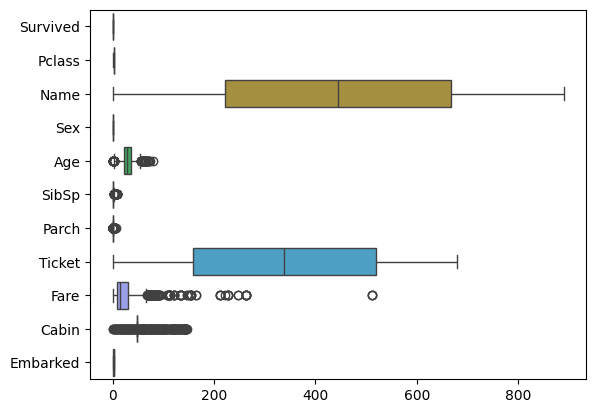

In [64]:
# analysing outliers using boxplot

sns.boxplot(data,orient='h')

In [67]:
# Treating the outliers 

outlier_cols = ['Age','SibSp','Parch','Fare','Cabin']

for col in outlier_cols:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1-1.5*(iqr)
    upper_fence = q3+1.5*(iqr)
    data[col] = data[col].clip(lower=lower_fence, upper=upper_fence)

# data sample
data.head()

Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket     Fare  Cabin  \
0         0       3   108    1  22.0    1.0      0     523   7.2500     47   
1         1       1   190    0  38.0    1.0      0     596  65.6344     47   
2         1       3   353    0  26.0    0.0      0     669   7.9250     47   
3         1       1   272    0  35.0    1.0      0      49  53.1000     47   
4         0       3    15    1  35.0    0.0      0     472   8.0500     47   

   Embarked  
0         2  
1         0  
2         2  
3         2  
4         2

<Axes: >

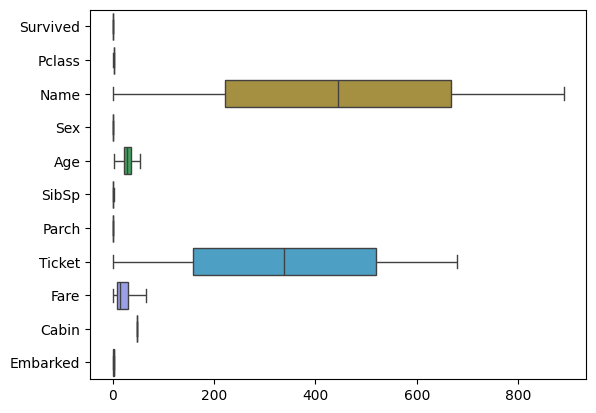

In [68]:
sns.boxplot(data,orient='h')